1# Assignment 3: Linear Regression and Gradient Descent from the Ground Up

The goal of this assignment is to work through the fundamentals of Simple Linear Regression (one independent variable) with Mean Squared Error (average L2 loss) using Gradient Descent.

## Submission Instructions

- Please submit your notebook as a **Jupyter Notebook** on Canvas.
- **Due Date: Wednesday, October 22 at 6:59pm**. 
- **No late submissions** will be accepted for this assignment.

 ## Collaboration:



You are allowed to work with others on this assignment.

Please list the names of those you work with below.

Collaborators: 

## Part 0 - Imports and CoW

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.linear_model import LinearRegression

In [4]:
#Set Copy-on-Write
pd.options.mode.copy_on_write = True

## Part 1 : Linear Regression
Suppose we create a linear model with parameters $\vec{\hat{\beta}}=[\hat{\beta}_0,...,\hat{\beta}_p]$
As we saw in lecture, such a model makes predictions $\hat{y}=\vec{\hat{\beta}}.\vec{x}=\sum{\hat{\beta}_ix_i}$ 


### 1.a. 
Suppose $\vec{\hat{\beta}}=[1,2,1]$ and we receive an observation $x = [4, 2, 1]$. What $\hat{y}$ value will
this model predict for the given observation?

y = 9

### 1.b.
Suppose the correct $y$ was 6.1. What will be the L2 loss for our prediction $\hat{y}$ from question 1.a?

l2_loss = (9 - 6.1)^2 = 8.41

## Part 2 : Gradient Descent with One Parameter

The following function generates the dataset you need for the rest of the questions

In [5]:
# This function helps generate a synthetic dataset based on a given slope value
def generate_dataset(slope, std=1, num_samples=100, with_intercept=True):
    X = np.random.random_sample(num_samples)
    e = np.random.randn(num_samples) * std 
    intercept = -int(with_intercept) * 2
    Y = slope * X + intercept + e
    #X=X.reshape(-1, 1)
    #Y=Y.reshape(-1, 1)
    data=pd.DataFrame({'X':X, 'Y':Y})
    return data

In [6]:
# Example:
data = generate_dataset(slope=10)
data

,X,Y
0,0.029899,-1.269616
1,0.589879,4.374714
2,0.614994,4.185305
3,0.147657,1.147699
4,0.417892,2.428203
...,...,...
95,0.232847,1.439235
96,0.273259,0.767211
97,0.677513,2.891462
98,0.477125,3.442849


### 2.a.

Using the following functions (gradient descent, mse_loss, and mse_loss_derivative), find the best value of slope that the gradient descent algorithm can find in 100 iterations for initial slope=0.1 and $\alpha=0.01$. 

In [7]:
def gradient_descent(df, initial_guess, alpha, n, data):
    #len of guess = 1
    guesses = [initial_guess]
    guess = initial_guess
    epoch_loss = {}
    i = 1

    while len(guesses) < n:
        #loss
        loss = mse_loss(guess, data)
        epoch_loss[i] = loss
        # weight update
        guess = guess - alpha * df(guess,data)
        guesses.append(guess)
        i+=1

    return np.array(guesses), epoch_loss

def mse_loss(slope, data):
    ''' Mean Squared Error Loss Function '''
    x = data['X']
    y_obs = data['Y']
    y_hat = slope * x
    return np.mean((y_hat - y_obs) ** 2)  

def mse_loss_derivative(slope, data):
    x = data['X']
    y_obs = data['Y']
    y_hat = slope * x
    return np.mean(2 * (y_hat - y_obs) * x)

In [8]:
slope = .1
a = .01
epochs = 100


weights, losses = gradient_descent(df=mse_loss_derivative, initial_guess=slope, alpha=a, n=epochs, data=data)
best_slope1 = weights[-1]
print(f"Best Slope: {best_slope1}")
print(f"Final Loss: {losses[99]}")

Best Slope: 3.0038439414611404
Final Loss: 5.719695345197444


### 2.b.

Now change the learning rate to be $\alpha=0.1$ and repeat 2.a


In [9]:
slope = .1
a = .1
epochs = 100

weights, losses = gradient_descent(df=mse_loss_derivative, initial_guess=slope, alpha=a, n=epochs, data=data)

best_slope2 = weights[-1]
print(f"Best Slope: {best_slope2}")
print(f"Final Loss: {losses[99]}")


Best Slope: 6.470548544405795
Final Loss: 1.9756213175727622


### 2.c.

Create two plots showing the simple linear regression models you fitted on the observed data when you pick the slope using the gradient descent algorithm above. One plot for data with and one plot for data without an intercept. Each plot should include at least the following:
- A scatter plot of all the observed data
- Regression lines for the simple linear regression models 
- An appropriate title, a legend showing which line is which, and labels for both axes

Clarification: Take the data generated (with_intercept=True) for 2A and 2B and plot the two lines that you fitted from 2A and 2B, plotted with a scatterplot of the data. Thats one plot. Then generate a new dataset without an intercept (set with_intercept=False when you call generate_dataset) and do the same plot again; two lines, one for each learning rate. The lines you are fitting are still models with no "bias term" (no theta-zero).


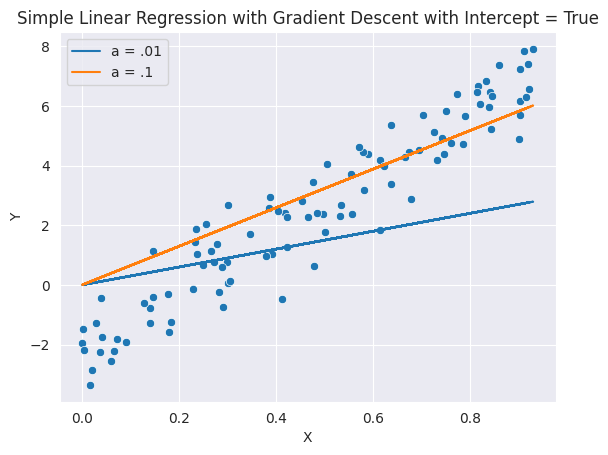

In [10]:
sns.scatterplot(data=data, x='X', y='Y')
plt.plot(data['X'], best_slope1 * data['X'], label='a = .01')
plt.plot(data['X'], best_slope2 * data['X'], label='a = .1')
plt.plot()
plt.legend()
plt.title('Simple Linear Regression with Gradient Descent with Intercept = True')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Observation
The data generated has values that fall below the X intercept due to intercept = -int(with_intercept) * 2 of the data generated creating values
below the x-intercept when with_intercept is set to true. Since our linear regression model has no theta_0 or bias weight to update during training it only
is able to create a model that starts from the origin point (0,0), this leads to a model that is not able to fit the data very well. We can also see that the model with the higher learning rate is able to fit the data better since it is able to converge faster on less training epochs, and as shown by the final loss values. However if we were to maybe train for longer the model with the smaller learning rate would be able to fit the data better.


The tradeoff I want you to observe is:

    When the linear data does not have an intercept, using a model with an intercept term (bias term) will take longer to converge.
    When the linear data does have an intercept, using a model without an intercept term (bias term) can’t fit it well.

In [11]:
data2 = generate_dataset(slope=10, with_intercept=False)


We need to go back and retrain the model with this new data now that it has data with no intercept

In [12]:
slope = .1
a = .1
epochs = 100


weights, losses = gradient_descent(df=mse_loss_derivative, initial_guess=slope, alpha=a, n=epochs, data=data2)


best_slope3 = weights[-1]


print(f"Best Slope: {best_slope3}")
print(f"Final Loss: {losses[99]}")



Best Slope: 9.740544462263319
Final Loss: 0.9111979574079636


In [13]:
slope = .1
a = .01
epochs = 100


weights, losses = gradient_descent(df=mse_loss_derivative, initial_guess=slope, alpha=a, n=epochs, data=data2)


best_slope4 = weights[-1]


print(f"Best Slope: {best_slope4}")
print(f"Final Loss: {losses[99]}")

Best Slope: 4.3673901391047565
Final Loss: 9.55854528752268


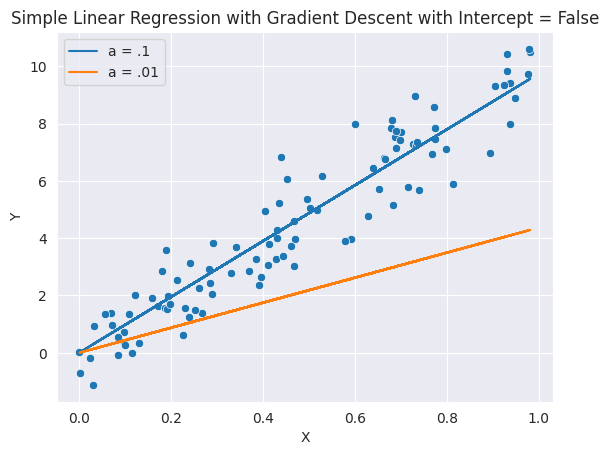

In [14]:
sns.scatterplot(data=data2, x='X', y='Y')
plt.plot(data2['X'], best_slope3 * data2['X'], label='a = .1')
plt.plot(data2['X'], best_slope4 * data2['X'], label='a = .01')
plt.plot()
plt.legend()
plt.title('Simple Linear Regression with Gradient Descent with Intercept = False')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

### 2.d.
Which value of $\alpha$ resulted in a better model? Why?

The value that resulted in the best a value was the .1 value; the reason is why because it has a larger step size meaning that the model was updating at a faster
rate, then the .01 value. However if given more training epochs the .01 maybe able to better fit and result in lower loss then the .1 value.


## Observation
When data is created with no intercept valuem, these models that have no bias term are able to better fit the data as evidenced by the lower loss value at the end for the .1 learning rate. However one intresting thing to note is that the model with the lower learning rate for data with no intercept has worse loss value at the end compared to the model with intercept data. As shown the first model is a "better" fit for the data past the x-intercept because it is tilted further there by leading to smaller loss.

## Part 3 : Gradient Descent with 1-2 parameters

### 3.a. 
Problem 2 did not include an intercept term (or "bias" term). Write a function calculate_y_hat(X, Y, with_intercept) that computes the value of y_hat for your model using either one or two parameters (slope and intercept or just slope) based on whether or not an intercept term is specified within the model. The argument with_intercept should be a boolean.

Hint: Use sklearn.linear_model.LinearRegression library

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [15]:

def calculate_y_hat(X, theta, theta_0,with_intercept):
    """
        Calculuates y hat with or without the intercept.
        Parameters
        ----------
        X: feature data
        Y: target data

        Returns
        -------
        weights needed for final model

    """
    if with_intercept:
        y_hat = theta * X + theta_0
    else:
        y_hat = theta * X
    return y_hat



In [16]:

def train(data, epochs, theta, theta_0, alpha):

    if theta_0 == -1:
        thetas = [theta]

    else:
        thetas = [(theta, theta_0)]

    epochs_loss = {}

    for i in range(epochs):
        if theta_0 == -1:
            y_hat = calculate_y_hat(data["X"], theta, theta_0, with_intercept=False)
        else :
            y_hat = calculate_y_hat(data["X"], theta, theta_0, with_intercept=True)

        loss  = np.mean((y_hat - data["Y"]) ** 2)
        epochs_loss[i] = loss
        #theta update
        theta = theta - alpha * np.mean(2 * (y_hat - data["Y"]) * data["X"])\

        if theta_0 != -1:
            theta_0 = theta_0 - alpha * np.mean(2 * (y_hat - data["Y"]))

            thetas.append((theta, theta_0))
        else:
            thetas.append(theta)

    return thetas, epochs_loss


In [17]:
## training for y hat no theta_0
epochs = 100
theta = 0
theta_0 = -1
alpha = .1

thetas = [theta]
epochs_loss = {}

thetas, epochs_loss = train(data, epochs, theta, theta_0, alpha)


best_theta1 = thetas[-1]
print("Best theta, ", best_theta1)
print("Final loss: ", epochs_loss[99])



Best theta,  6.471124477639049
Final loss:  1.9756164768877331


In [18]:
## training for y hat with theta_0
epochs = 100
theta = 0
theta_0 = 0
alpha = .1
thetas, epochs_loss = train(data, epochs, theta, theta_0, alpha)


best_theta2 = thetas[-1]
print("Best theta, ", best_theta2)
print("Final loss: ", epochs_loss[99])



Best theta,  (np.float64(7.450062803363217), np.float64(-0.9432764474544965))
Final loss:  1.2379537013178707


)### 3.b.

Create a plot below comparing our fitted simple linear regression model on the observed data for when it includes an intercept v.s. when it does not include an intercept. Your plot should include at least the following:
- A scatter plot of all the observed data
- A line plot for the simple linear regression model without an intercept
- A line plot for the simple linear regression model with an intercept
- An appropriate title, a legend labeling which line contains an intercept, and labels for both axes

You should use different colors for the two line plots

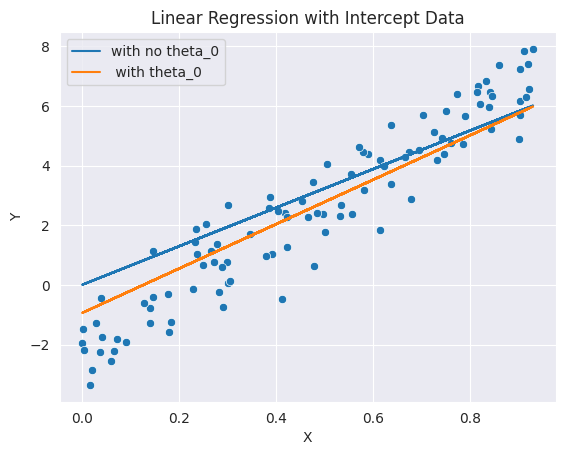

In [19]:
theta, theta_0 = best_theta2

sns.scatterplot(data=data, x='X', y='Y')
plt.plot(data['X'], best_theta1 * data['X'], label='with no theta_0')
plt.plot(data['X'], theta * data['X'] + theta_0, label=' with theta_0')
plt.legend()
plt.title('Linear Regression with Intercept Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [30]:
#training a model with no bias term on data that does not have an intercept
epochs = 100
theta = 0
theta_0 = -1
alpha = .1
thetas, epochs_loss = train(data2, epochs, theta, theta_0, alpha)


best_theta3 = thetas[-1]
print("Best theta, ", best_theta3)
print("Final loss: ", epochs_loss[99])

Best theta,  9.741733321561261
Final loss:  0.9111792997843486


In [31]:
#training a model with bias term on data that does have an intercept
epochs = 100
theta = 0
theta_0 = 0
alpha = .1
thetas, epochs_loss = train(data2, epochs, theta, theta_0, alpha)

best_theta4 = thetas[-1]
print("Best theta, ", best_theta4)
print("Final loss: ", epochs_loss[99])

Best theta,  (np.float64(7.937849770413616), np.float64(0.8481024913269838))
Final loss:  1.302667487292384


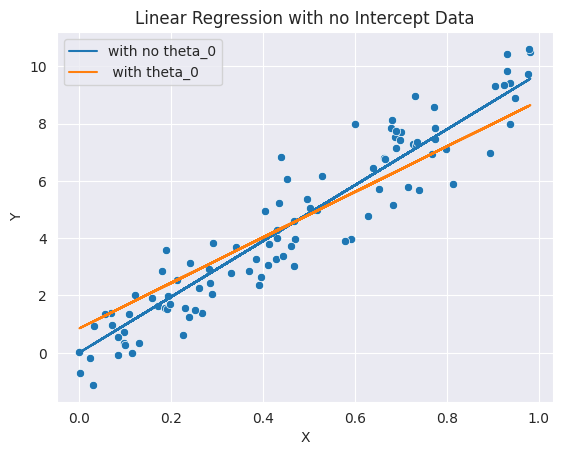

In [32]:
theta, theta_0 = best_theta4

sns.scatterplot(data=data2, x='X', y='Y')
plt.plot(data2['X'], best_theta3 * data2['X'], label='with no theta_0')
plt.plot(data2['X'], theta * data2['X'] + theta_0, label=' with theta_0')
plt.legend()
plt.title('Linear Regression with no Intercept Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Observation

As shown above we trained 2 models each for each type of data, one with an intercept and one without an intercept. For the first set of data that does have an intercept;  we have two models one with a bias term theta_0 and one without. As shown by the visualization and the final loss of both of the models; the model with the theta_0 has a better fit for the data, and the one without the theta_0 has a worse fit. The model with the theta_0 ended with a loss of 1.23, and the model without the theta_0 ended with a loss of 1.97.

For the second set of data that does not have an intercept; we have two models one with a bias term theta_0 and one without. As shown by the visualization and the final loss of both of the models; the model without the theta_0 had a better fit, indicating that the model with the theta_0 is taking longer to converge. This is evidence by the the fact that this model with theta_0 still performed well and got closer to the model without theta_0 convergence when given more training epochs.